# 1. Data preprocessing and exploration

## 1.1. Importing libraries and dataset

In [62]:


# bib pour la manipulation de la base de connaissances (data.csv)
import pandas as pd

# bib pour l'utilisation des vecteurs et des matrices (tout ce qui est calcul scientifique)
import numpy as np

#bib pour la visualisation des courbes (matplotlib) en 2D (pyplot)
import matplotlib.pyplot as plt

# bib pour visualiser et manipuler les outils statistiques
import seaborn as sns


#biblio pour l'apprentissage


from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics
from sklearn import tree


#bib pour ignorer les affiches d'alertes rouges (warnings)
import warnings
warnings.filterwarnings('ignore')

In [2]:
# lire le fichier de la base de connaissances
dataset = pd.read_csv('data.csv')

In [4]:
# lire les cinq pemières lignes de la base de connaissances
dataset.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [5]:
#lire la taille de la base de connaissances (569 lignes / 33 caractéristiques)
dataset.shape

(569, 33)

## 1.2. Statistical description


In [6]:
# vérifier s'il y a des valeurs manquantes
dataset.isnull().sum()

id                           0
diagnosis                    0
radius_mean                  0
texture_mean                 0
perimeter_mean               0
area_mean                    0
smoothness_mean              0
compactness_mean             0
concavity_mean               0
concave points_mean          0
symmetry_mean                0
fractal_dimension_mean       0
radius_se                    0
texture_se                   0
perimeter_se                 0
area_se                      0
smoothness_se                0
compactness_se               0
concavity_se                 0
concave points_se            0
symmetry_se                  0
fractal_dimension_se         0
radius_worst                 0
texture_worst                0
perimeter_worst              0
area_worst                   0
smoothness_worst             0
compactness_worst            0
concavity_worst              0
concave points_worst         0
symmetry_worst               0
fractal_dimension_worst      0
Unnamed:

In [7]:
# supprimer la colonne de valeur null
dataset = dataset.dropna(axis=1)

In [8]:
#lire la nouvelle taille de la base de connaissances 
dataset.shape

(569, 32)

In [9]:
#vérifier les différentes information descriptives 'colonnes' ainsi que leur type
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 32 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

In [10]:
#afficher les nombres de Malignant(M) et Bingn(B)
dataset['diagnosis'].value_counts()

B    357
M    212
Name: diagnosis, dtype: int64

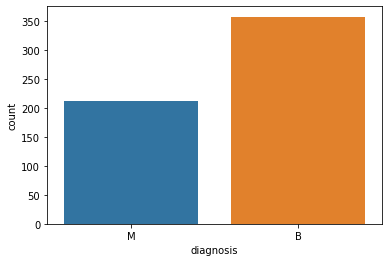

In [11]:
#Visualize ces nombres
sns.countplot(dataset['diagnosis'],label="count")

In [12]:
dataset.head(100)


,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.990,10.38,122.80,1001.0,0.11840,0.27760,0.300100,0.147100,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.053730,0.015870,0.03003,0.006193,25.38,17.33,184.60,2019.0,0.1622,0.66560,0.71190,0.26540,0.4601,0.11890
1,842517,M,20.570,17.77,132.90,1326.0,0.08474,0.07864,0.086900,0.070170,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.018600,0.013400,0.01389,0.003532,24.99,23.41,158.80,1956.0,0.1238,0.18660,0.24160,0.18600,0.2750,0.08902
2,84300903,M,19.690,21.25,130.00,1203.0,0.10960,0.15990,0.197400,0.127900,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.038320,0.020580,0.02250,0.004571,23.57,25.53,152.50,1709.0,0.1444,0.42450,0.45040,0.24300,0.3613,0.08758
3,84348301,M,11.420,20.38,77.58,386.1,0.14250,0.28390,0.241400,0.105200,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.056610,0.018670,0.05963,0.009208,14.91,26.50,98.87,567.7,0.2098,0.86630,0.68690,0.25750,0.6638,0.17300
4,84358402,M,20.290,14.34,135.10,1297.0,0.10030,0.13280,0.198000,0.104300,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.056880,0.018850,0.01756,0.005115,22.54,16.67,152.20,1575.0,0.1374,0.20500,0.40000,0.16250,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,86208,M,20.260,23.03,132.40,1264.0,0.09078,0.13130,0.146500,0.086830,0.2095,0.05649,0.7576,1.5090,4.554,87.87,0.006016,0.03482,0.042320,0.012690,0.02657,0.004411,24.22,31.59,156.10,1750.0,0.1190,0.35390,0.40980,0.15730,0.3689,0.08368
96,86211,B,12.180,17.84,77.79,451.1,0.10450,0.07057,0.024900,0.029410,0.1900,0.06635,0.3661,1.5110,2.410,24.44,0.005433,0.01179,0.011310,0.015190,0.02220,0.003408,12.83,20.92,82.14,495.2,0.1140,0.09358,0.04980,0.05882,0.2227,0.07376
97,862261,B,9.787,19.94,62.11,294.5,0.10240,0.05301,0.006829,0.007937,0.1350,0.06890,0.3350,2.0430,2.132,20.05,0.011130,0.01463,0.005308,0.005250,0.01801,0.005667,10.92,26.29,68.81,366.1,0.1316,0.09473,0.02049,0.02381,0.1934,0.08988
98,862485,B,11.600,12.84,74.34,412.6,0.08983,0.07525,0.041960,0.033500,0.1620,0.06582,0.2315,0.5391,1.475,15.75,0.006153,0.01330,0.016930,0.006884,0.01651,0.002551,13.06,17.16,82.96,512.5,0.1431,0.18510,0.19220,0.08449,0.2772,0.08756


In [13]:
#description détaillée de la base de connaissance (que les colonnes de type Numérique)
dataset.describe()
#Remarque : std signifie l'écart type qui est la racine carrée de la variance
#ces valeurs montrent que : 20.37% des clients ne sont pas fidèles  
#salaire annuelle maximale : 199992.480000
#les quartiles 
#bech tal3 description statestique mt3 les colonne selon count, mean,...

,id,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
count,5.690000e+02,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,3.037183e+07,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,0.405172,1.216853,2.866059,40.337079,0.007041,0.025478,0.031894,0.011796,0.020542,0.003795,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,1.250206e+08,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,0.277313,0.551648,2.021855,45.491006,0.003003,0.017908,0.030186,0.006170,0.008266,0.002646,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,8.670000e+03,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,0.111500,0.360200,0.757000,6.802000,0.001713,0.002252,0.000000,0.000000,0.007882,0.000895,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,8.692180e+05,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,0.232400,0.833900,1.606000,17.850000,0.005169,0.013080,0.015090,0.007638,0.015160,0.002248,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,9.060240e+05,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,0.324200,1.108000,2.287000,24.530000,0.006380,0.020450,0.025890,0.010930,0.018730,0.003187,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,8.813129e+06,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,0.478900,1.474000,3.357000,45.190000,0.008146,0.032450,0.042050,0.014710,0.023480,0.004558,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,9.113205e+08,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,2.873000,4.885000,21.980000,542.200000,0.031130,0.135400,0.396000,0.052790,0.078950,0.029840,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


In [14]:
dataset.iloc[:,1:12].corr()
#la relation entre les colonne

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean
radius_mean,1.000000,0.323782,0.997855,0.987357,0.170581,0.506124,0.676764,0.822529,0.147741,-0.311631
texture_mean,0.323782,1.000000,0.329533,0.321086,-0.023389,0.236702,0.302418,0.293464,0.071401,-0.076437
perimeter_mean,0.997855,0.329533,1.000000,0.986507,0.207278,0.556936,0.716136,0.850977,0.183027,-0.261477
area_mean,0.987357,0.321086,0.986507,1.000000,0.177028,0.498502,0.685983,0.823269,0.151293,-0.283110
smoothness_mean,0.170581,-0.023389,0.207278,0.177028,1.000000,0.659123,0.521984,0.553695,0.557775,0.584792
compactness_mean,0.506124,0.236702,0.556936,0.498502,0.659123,1.000000,0.883121,0.831135,0.602641,0.565369
concavity_mean,0.676764,0.302418,0.716136,0.685983,0.521984,0.883121,1.000000,0.921391,0.500667,0.336783
concave points_mean,0.822529,0.293464,0.850977,0.823269,0.553695,0.831135,0.921391,1.000000,0.462497,0.166917
symmetry_mean,0.147741,0.071401,0.183027,0.151293,0.557775,0.602641,0.500667,0.462497,1.000000,0.479921
fractal_dimension_mean,-0.311631,-0.076437,-0.261477,-0.283110,0.584792,0.565369,0.336783,0.166917,0.479921,1.000000


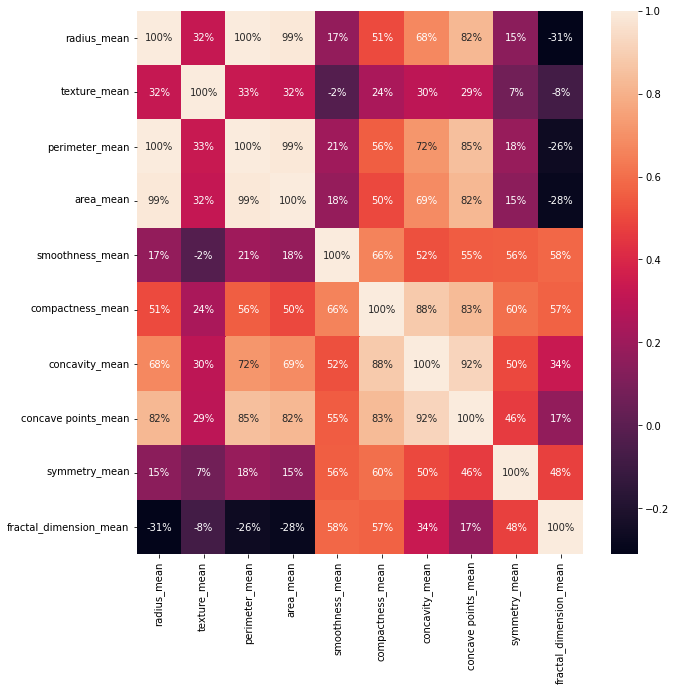

In [15]:
plt.figure(figsize=(10,10))
sns.heatmap(dataset.iloc[:,1:12].corr(), annot=True , fmt='.0%')
#visualisation de corr de colonne

## 1.3. Boxplot : 
l'objectif est de savoir parquoi on va remplacer nos valeurs 'numériques' manquantes (moyenne ou médiane) 

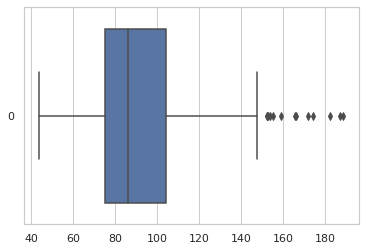

In [16]:
#Boxplot représente l'inervalle de confience
# fond du plan de la courbe
sns.set(style='whitegrid')
#le Boxplot de la colonne 'creditscore' qui sera affiché horizentallement 'h' (ou verticale 'v')
ax = sns.boxplot(data = dataset['perimeter_mean'], orient = 'h')

In [17]:
#calcul de IQR 
IQR = dataset['perimeter_mean'].quantile(0.75)-dataset['perimeter_mean'].quantile(0.25)
print (IQR)

28.929999999999993


In [18]:
#Caclcul de la borne inférieur (min)
Inf = dataset['perimeter_mean'].quantile(0.25)-1.5*IQR
print (Inf)

31.775000000000013


In [19]:
# cependant, on a des valeurs qui sont plus inférieurs que 383 ; ces clients représentent les outlayers 

In [20]:
# on veux représenter les clients qui ont un créditScore < 383, càd qui représentent les outlayers 
dataset[dataset['perimeter_mean']<Inf]

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst


In [21]:
#si on veux maintenant compter les clients qui appartient aux outlayers 
dataset[dataset['perimeter_mean']<Inf].count()

id                         0
diagnosis                  0
radius_mean                0
texture_mean               0
perimeter_mean             0
area_mean                  0
smoothness_mean            0
compactness_mean           0
concavity_mean             0
concave points_mean        0
symmetry_mean              0
fractal_dimension_mean     0
radius_se                  0
texture_se                 0
perimeter_se               0
area_se                    0
smoothness_se              0
compactness_se             0
concavity_se               0
concave points_se          0
symmetry_se                0
fractal_dimension_se       0
radius_worst               0
texture_worst              0
perimeter_worst            0
area_worst                 0
smoothness_worst           0
compactness_worst          0
concavity_worst            0
concave points_worst       0
symmetry_worst             0
fractal_dimension_worst    0
dtype: int64

In [22]:
#Caclcul de la borne supérieur (max)
# le résultat montre que la valeur de la borne suppérieur est 919 qui n'est pas atteinte dans la banque
# car la valeur max prélevée est max= 850
Sup = dataset['perimeter_mean'].quantile(0.75)+1.5*IQR
print (Sup)

147.49499999999998


In [23]:
# on veux mnt afficher 2 boxplots

In [24]:
#on veux créer une liste qui ne contiendra que deux variables 'creditscore' et'age'
my_list = ['diagnosis', 'area_mean']
my_list

['diagnosis', 'area_mean']

In [25]:
#afficher le conteu de la base en fonction des variables de la liste
dataset[my_list].head()

,diagnosis,area_mean
0,M,1001.0
1,M,1326.0
2,M,1203.0
3,M,386.1
4,M,1297.0


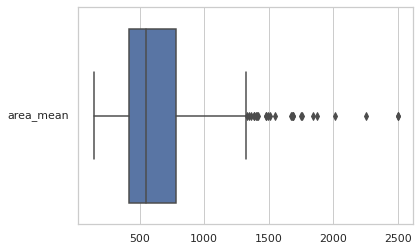

In [26]:
#afficuer le boxplot des deux colonnes 'creditscore' et 'age' au même temps
ax = sns.boxplot(data = dataset[my_list], orient = 'h')

In [27]:
# on génére les boxplots pour remplacer les valeurs numériques manquantes
# bornes [inf..sup] représentent l'intervalle de confiance

     # si : il n'existent pas des outlayers --> on remplace les valeurs manquantes par la moyenne
     # si : il exite des outlayers --> on remplace les valeurs manquantes par la médiane(50% du tableaux trié sachant que le tableau est organisé comme suit: [25% - 50% - 75%]) 

## 1.4. Scatter Plot : 
permet de représenter, s'il y a, la relation entre deux variables (ex: age-CreditScore) pour dégager le modéle (linéaire, exponentielle...) qui les relient ou même éparpillé càd pas de relation entre les deux variables

Text(0, 0.5, 'diagnosis')

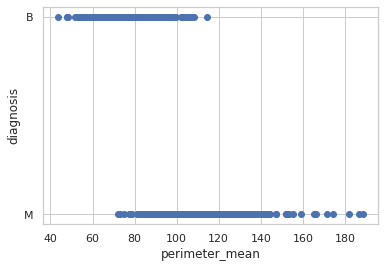

In [28]:
# afficher la nuage de points [age - CreditScore]
plt.scatter(x=dataset['perimeter_mean'],y=dataset['diagnosis'])

# représenter le label de l'axe des x (age)
plt.xlabel('perimeter_mean')

# représenter le label de l'axe des y (creditScore)
plt.ylabel('diagnosis')

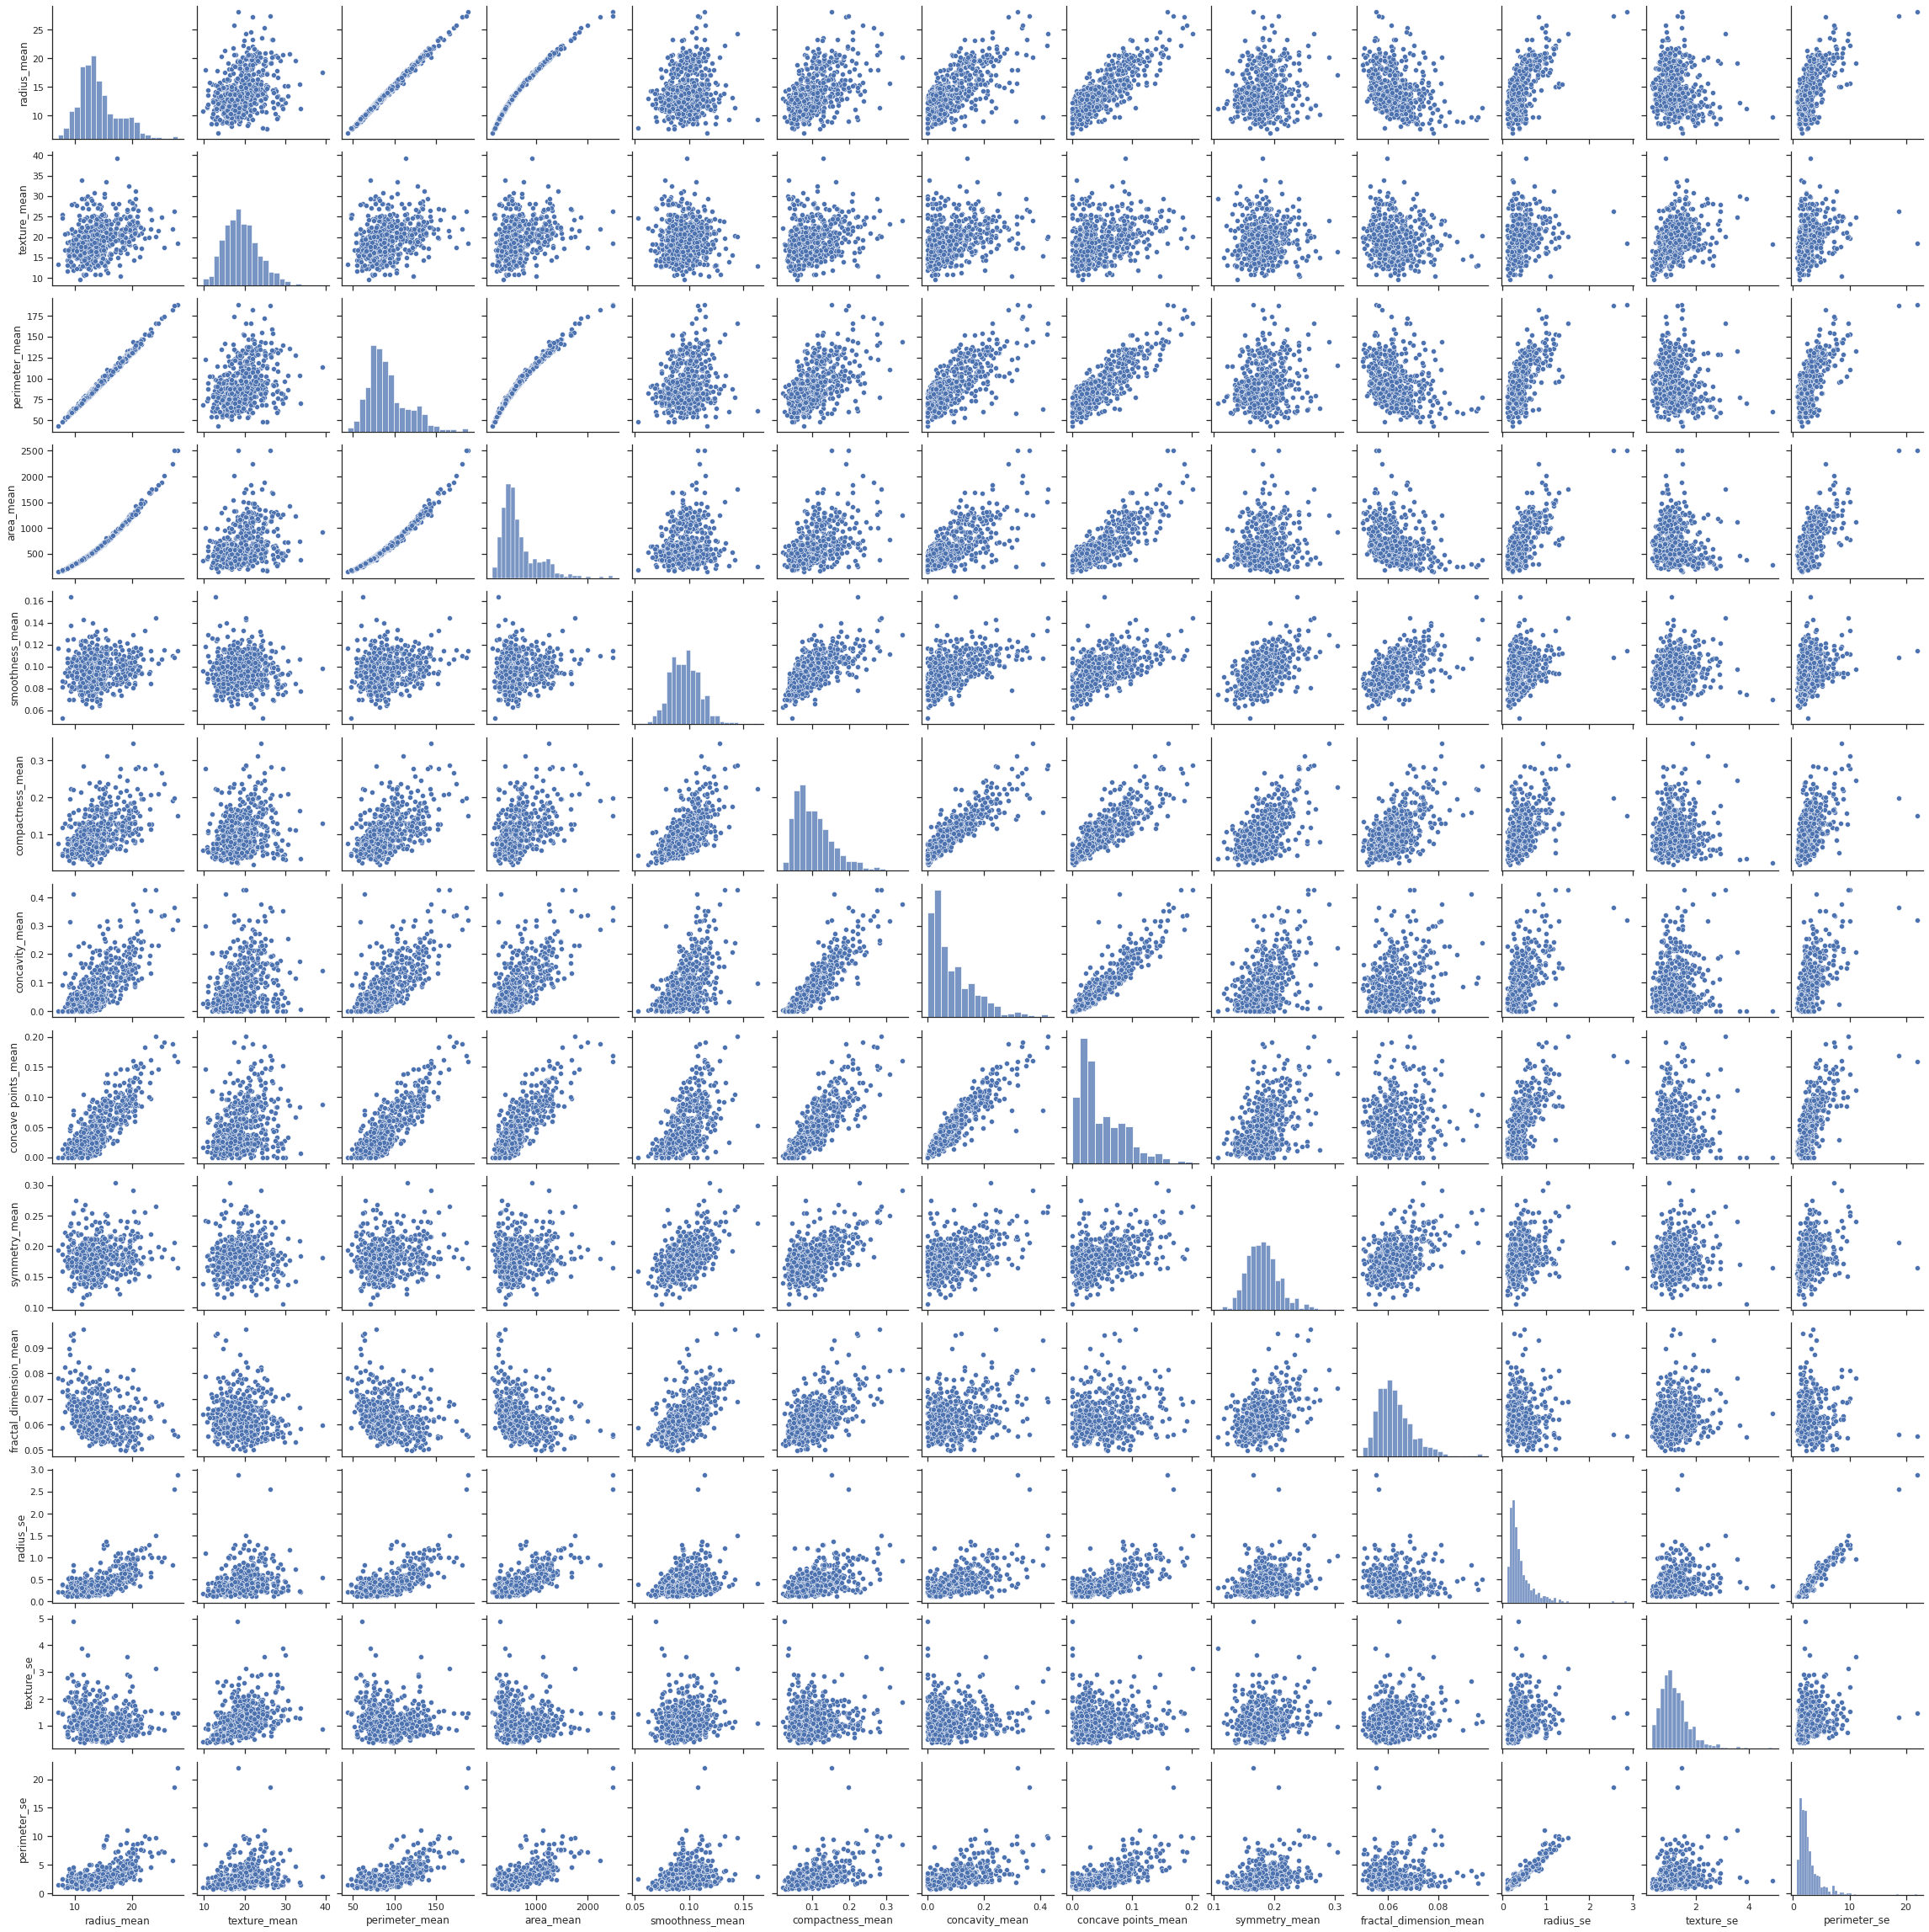

In [29]:
#toutes les combinaisons des variables (columns) possibles
sns.set(style='ticks')
sns.pairplot(dataset.iloc[:,1:15])

#par exemple : pour les variables où on a une ligne en dehaut et une autre en bas représentent des valeurs booléannes 0 ou 1.

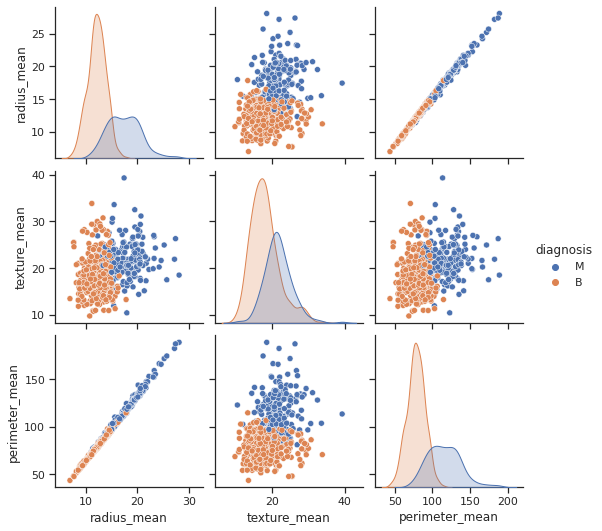

In [30]:
sns.pairplot(dataset.iloc[:,1:5], hue='diagnosis')

## 1.5. Input variables and target : 
iloc. permet la LOCALISATION dun INDICE dune information dans la base

In [31]:
#axe des colonnes : les variables qui vont intervenir comme des Features [Position 3 jusqu'à 12]
X = dataset.iloc[:,2:31] # veux dire toutes les lignes et les colonnes de [3 à 13-1]

#axe des lignes : Variable cible dont la position est 13 [Exited]
y = dataset.iloc[:,1] # veux dire toutes les lignes et la colonne 13

In [32]:
y.head(100)

0     M
1     M
2     M
3     M
4     M
     ..
95    M
96    B
97    B
98    B
99    M
Name: diagnosis, Length: 100, dtype: object

In [33]:
#afficher l'axe des X uniquement (variables = [2..31])
X.head()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364


In [34]:
#l'axe des X est une table de donées (DataFrame) : qui représentent les Features ont fonction des quels ont va générer le model
type(X)

pandas.core.frame.DataFrame

In [35]:
#l'axe des y est une série de données [0-1-0-1...] : Y représente la cible à prédire [variable : Existed]
type(y)

pandas.core.series.Series

**Convert DataFrame to Numpy Array**

In [36]:
#on veux mnt convertir le DataFrame en une matrice
X = X.values
#Y représentent des valeurs en Pandas.serie de la cible [existed]
y = y.values

In [37]:
# X a été convertie d'une DataFrame à une Matrice.Numpy
type(X)

numpy.ndarray

In [38]:
# Y restera une série
type(y)

numpy.ndarray

In [39]:
#Reprénte la matrice des Features (5 premières lignes pour toutes les colonnes)
X[0:5,:]

array([[1.799e+01, 1.038e+01, 1.228e+02, 1.001e+03, 1.184e-01, 2.776e-01,
        3.001e-01, 1.471e-01, 2.419e-01, 7.871e-02, 1.095e+00, 9.053e-01,
        8.589e+00, 1.534e+02, 6.399e-03, 4.904e-02, 5.373e-02, 1.587e-02,
        3.003e-02, 6.193e-03, 2.538e+01, 1.733e+01, 1.846e+02, 2.019e+03,
        1.622e-01, 6.656e-01, 7.119e-01, 2.654e-01, 4.601e-01],
       [2.057e+01, 1.777e+01, 1.329e+02, 1.326e+03, 8.474e-02, 7.864e-02,
        8.690e-02, 7.017e-02, 1.812e-01, 5.667e-02, 5.435e-01, 7.339e-01,
        3.398e+00, 7.408e+01, 5.225e-03, 1.308e-02, 1.860e-02, 1.340e-02,
        1.389e-02, 3.532e-03, 2.499e+01, 2.341e+01, 1.588e+02, 1.956e+03,
        1.238e-01, 1.866e-01, 2.416e-01, 1.860e-01, 2.750e-01],
       [1.969e+01, 2.125e+01, 1.300e+02, 1.203e+03, 1.096e-01, 1.599e-01,
        1.974e-01, 1.279e-01, 2.069e-01, 5.999e-02, 7.456e-01, 7.869e-01,
        4.585e+00, 9.403e+01, 6.150e-03, 4.006e-02, 3.832e-02, 2.058e-02,
        2.250e-02, 4.571e-03, 2.357e+01, 2.553e+01, 1.525e

In [40]:
X.shape

(569, 29)

## 1.6. Encoding categorical data : 
cela vise à convertir les valeurs de type chaîne de caractéres en des valeurs numérique parceque les models satistiques ne comprennent pas les valeurs str

In [41]:
# convertir les variables de type chaîne de caractéres en des variables numériques (en se basant sur l'orde alphabétique)
# Benign va prendre la valeur 0  et Malignant va prendre la valeur 1 

# sklearn = bibliohèque
# .preprocessing = module qui appartien à la bibliothéque
# LabelEncoder = classe (fonctionnalité du module .preprocessing)
from sklearn.preprocessing import LabelEncoder
label = LabelEncoder()

from sklearn.preprocessing import LabelEncoder
Labelencoder_Y = LabelEncoder()


In [42]:
dataset.iloc[:,1] = label.fit_transform(dataset.iloc[:,1].values)
y = dataset.iloc[:,1]
y.head

<bound method NDFrame.head of 0      1
1      1
2      1
3      1
4      1
      ..
564    1
565    1
566    1
567    1
568    0
Name: diagnosis, Length: 569, dtype: int64>

## 1.7. Splitting dataset into train and test sets : 
diviser les données en des données d'entrainnement et des données de test

In [43]:
#diviser la base de connaissances en deux parties : test et train (avec équilibrage)
# avec la partie train => on va construire notre model en se basnt sur l'un des algorithmes (DT, Knn, etc)
# on appliquera par la suite ce model sur la partie Test et on compare les résultats de prédiction générée avec celles du test [Existed]
from sklearn.model_selection import train_test_split

#donner le pourcentage de la base de test 20% (test_size=0.2)
# on fixe randon_state = 0 : pourque la base d'apprentissage et de test ne changent pas au cours de l'exécution. Encore, si on exécute sur une autre machine on obtiendra la même répartition
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=0)

In [44]:
# Taille de la base de train
X_train.shape

(455, 29)

In [45]:
# taille de la base de test
X_test.shape

(114, 29)

In [46]:
#moyenne des 0 et de 1 sur toute la base 
y.mean()

0.37258347978910367

In [47]:
#moyenne des 0 et de 1 sur la base d'apprentisage 
print(y_train.mean())

#moyenne des 0 et de 1 sur la base de test 
print(y_test.mean())

0.3626373626373626
0.41228070175438597


## 1.8. Feature scaling : Mise à échelle des features

In [48]:
# Problèmatique : si on utilise la distance euclidienne; une caracrétistique (nombre d'année d'expérience) sera négligéable par rapport (salaire)
# Solution : Normalisation ou la standarisation

In [49]:
#Pour la Standarisation :
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [50]:
#standarisation des valeurs de la matrice des features

#fit ici c pour stocker les données dans la RAM
X_train_sc = scaler.fit_transform(X_train)

X_test_sc = scaler.transform(X_test)

In [51]:
#Pour la Normalisation :
#from sklearn.preprocessing import MinMaxScaler

In [52]:
#afficher premier ligne sans standarisation
X_train[0,:]

array([1.005e+01, 1.753e+01, 6.441e+01, 3.108e+02, 1.007e-01, 7.326e-02,
       2.511e-02, 1.775e-02, 1.890e-01, 6.331e-02, 2.619e-01, 2.015e+00,
       1.778e+00, 1.685e+01, 7.803e-03, 1.449e-02, 1.690e-02, 8.043e-03,
       2.100e-02, 2.778e-03, 1.116e+01, 2.684e+01, 7.198e+01, 3.840e+02,
       1.402e-01, 1.402e-01, 1.055e-01, 6.499e-02, 2.894e-01])

In [53]:
#afficher premier ligne avec standarisation
X_train_sc[0,:]

array([-1.15036482, -0.39064196, -1.12855021, -0.95876358,  0.3109837 ,
       -0.5959945 , -0.80259612, -0.80249002,  0.29453906,  0.0942515 ,
       -0.4950523 ,  1.48720153, -0.51448782, -0.49154005,  0.28149837,
       -0.60451206, -0.46900701, -0.61170002,  0.05798237, -0.35763702,
       -1.0431756 ,  0.21353282, -1.0360446 , -0.84880771,  0.34249851,
       -0.73009743, -0.81232053, -0.75798367, -0.01614761])

# DecisionTreeClassifier

In [55]:
model = tree.DecisionTreeClassifier(max_depth= 3 , min_samples_leaf=12)

model.fit(X_train,y_train)

ACC = model.score(X_train,y_train)    
print("Train dataset Accuracy = %"+ str(ACC*100))

ACC = model.score(X_test,y_test)    
print("Test dataset Accuracy = %"+ str(ACC*100))

y_pred_decisionTree = model.predict(X_test)

ACC = metrics.accuracy_score(y_test,y_pred_decisionTree)    
print("Accuracy = %"+ str(ACC*100))


Train dataset Accuracy = %95.16483516483515
Test dataset Accuracy = %96.49122807017544
Accuracy = %96.49122807017544


In [56]:
!pip install scikit-plot

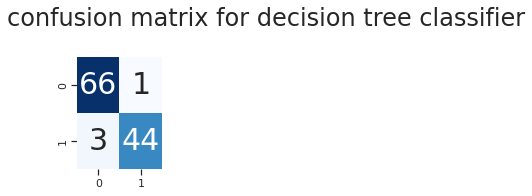

In [65]:
from sklearn.metrics import confusion_matrix
matrice = confusion_matrix(y_test,y_pred_decisionTree)
plt.figure(figsize=(7,7))
plt.suptitle("confusion matrix for decision tree classifier",fontsize=24)
plt.subplot(3,4,1)
sns.heatmap(matrice,annot=True,cmap="Blues",fmt="d",cbar=False, annot_kws={"size": 30})

# RANDOM FOREST

In [66]:
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier()

model.fit(X_train,y_train)

ACC = model.score(X_train,y_train)    
print("Train dataset Accuracy = %"+ str(ACC*100))

ACC = model.score(X_test,y_test)    
print("Test dataset Accuracy = %"+ str(ACC*100))

y_pred_RandomForest = model.predict(X_test)

ACC = metrics.accuracy_score(y_test,y_pred_RandomForest)    
print("Accuracy = %"+ str(ACC*100))

Train dataset Accuracy = %100.0
Test dataset Accuracy = %96.49122807017544
Accuracy = %96.49122807017544


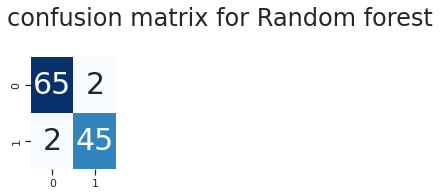

In [72]:
matrice=confusion_matrix(y_test,y_pred_RandomForest)
plt.figure(figsize=(7,7))
plt.suptitle("confusion matrix for Random forest",fontsize=24)
plt.subplot(3,4,1)
sns.heatmap(matrice,annot=True,cmap="Blues",fmt="d",cbar=False, annot_kws={"size": 30})

# K-NN

In [68]:
from sklearn.neighbors import KNeighborsClassifier

model =KNeighborsClassifier(3)

model.fit(X_train,y_train)

ACC = model.score(X_train,y_train)    
print("Train dataset Accuracy = %"+ str(ACC*100))

ACC = model.score(X_test,y_test)    
print("Test dataset Accuracy = %"+ str(ACC*100))

y_pred_knn_o = model.predict(X_test)

ACC = metrics.accuracy_score(y_test,y_pred_knn_o)    
print("Accuracy = %"+ str(ACC*100))

Train dataset Accuracy = %96.04395604395604
Test dataset Accuracy = %91.22807017543859
Accuracy = %91.22807017543859


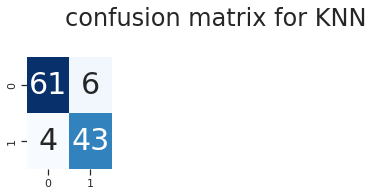

In [69]:
matrice=confusion_matrix(y_test,y_pred_knn_o)
plt.figure(figsize=(7,7))
plt.suptitle("confusion matrix for KNN",fontsize=24)
plt.subplot(3,4,1)
sns.heatmap(matrice,annot=True,cmap="Blues",fmt="d",cbar=False, annot_kws={"size": 30})

# support vector machine


In [70]:
from sklearn.svm import SVC

svm = SVC(random_state=1)

svm.fit(X_train,y_train)

ACC = svm.score(X_train,y_train)    
print("Train dataset Accuracy = %"+ str(ACC*100))

ACC = svm.score(X_test,y_test)    
print("Test dataset Accuracy = % "+ str(ACC*100))



y_pred_SVM = model.predict(X_test)

ACC = metrics.accuracy_score(y_test,y_pred_SVM)    
print("Accuracy = %"+ str(ACC*100))

Train dataset Accuracy = %90.98901098901099
Test dataset Accuracy = % 92.98245614035088
Accuracy = %91.22807017543859


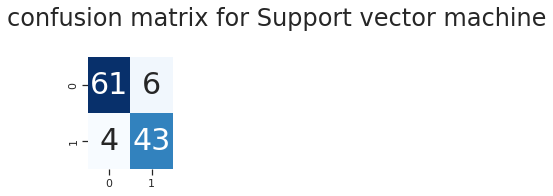

In [75]:
matrice=confusion_matrix(y_test,y_pred_SVM)
plt.figure(figsize=(7,7))
plt.suptitle("confusion matrix for Support vector machine",fontsize=24)
plt.subplot(3,4,1)
sns.heatmap(matrice,annot=True,cmap="Blues",fmt="d",cbar=False, annot_kws={"size": 30})

# AdaBoostClassifier

In [78]:
from sklearn.ensemble import AdaBoostClassifier

clf = AdaBoostClassifier(n_estimators=100, random_state=0)

clf.fit(X_train,y_train)

ACC = clf.score(X_train,y_train)    
print("Train dataset Accuracy = %"+ str(ACC*100))

ACC = clf.score(X_test,y_test)    
print("Test dataset Accuracy = % "+ str(ACC*100))
y_pred_AdaBoost = model.predict(X_test)

ACC = metrics.accuracy_score(y_test,y_pred_AdaBoost)    
print("Accuracy = %"+ str(ACC*100))

Train dataset Accuracy = %100.0
Test dataset Accuracy = % 95.6140350877193
Accuracy = %91.22807017543859


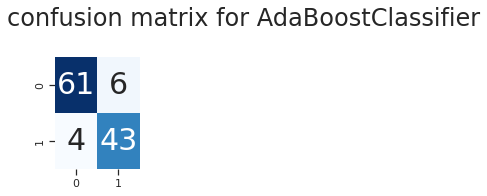

In [79]:
matrice=confusion_matrix(y_test,y_pred_AdaBoost)
plt.figure(figsize=(7,7))
plt.suptitle("confusion matrix for AdaBoostClassifier",fontsize=24)
plt.subplot(3,4,1)
sns.heatmap(matrice,annot=True,cmap="Blues",fmt="d",cbar=False, annot_kws={"size": 30})

# BaggingClassifier

In [82]:
from sklearn.ensemble import BaggingClassifier

clf = BaggingClassifier(base_estimator=SVC(),n_estimators=10, random_state=0)

clf.fit(X_train,y_train)

ACC = clf.score(X_train,y_train)    
print("Train dataset Accuracy = %"+ str(ACC*100))

ACC = clf.score(X_test,y_test)    
print("Test dataset Accuracy = % "+ str(ACC*100))
y_pred_Bagging = model.predict(X_test)

ACC = metrics.accuracy_score(y_test,y_pred_AdaBoost)    
print("Accuracy = %"+ str(ACC*100))


Train dataset Accuracy = %90.76923076923077
Test dataset Accuracy = % 92.98245614035088
Accuracy = %91.22807017543859


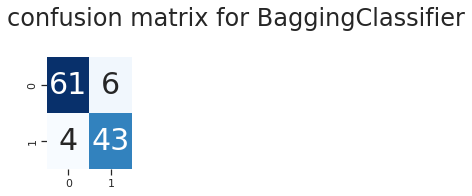

In [83]:
matrice=confusion_matrix(y_test,y_pred_Bagging)
plt.figure(figsize=(7,7))
plt.suptitle("confusion matrix for BaggingClassifier",fontsize=24)
plt.subplot(3,4,1)
sns.heatmap(matrice,annot=True,cmap="Blues",fmt="d",cbar=False, annot_kws={"size": 30})

# MultinomialNB

In [84]:
from sklearn.naive_bayes import MultinomialNB

nb = MultinomialNB()
nb.fit(X_train,y_train)

ACC = nb.score(X_train,y_train)    
print("Train dataset Accuracy = %"+ str(ACC*100))

ACC = nb.score(X_test,y_test)    
print("Test dataset Accuracy = % "+ str(ACC*100))

y_pred_Multinomial = model.predict(X_test)

ACC = metrics.accuracy_score(y_test,y_pred_Multinomial)    
print("Accuracy = %"+ str(ACC*100))

Train dataset Accuracy = %89.67032967032968
Test dataset Accuracy = % 89.47368421052632
Accuracy = %91.22807017543859


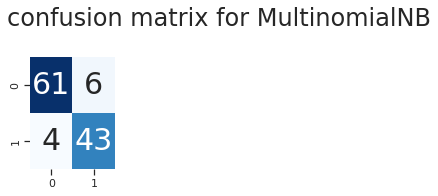

In [85]:
matrice=confusion_matrix(y_test,y_pred_Multinomial)
plt.figure(figsize=(7,7))
plt.suptitle("confusion matrix for MultinomialNB",fontsize=24)
plt.subplot(3,4,1)
sns.heatmap(matrice,annot=True,cmap="Blues",fmt="d",cbar=False, annot_kws={"size": 30})

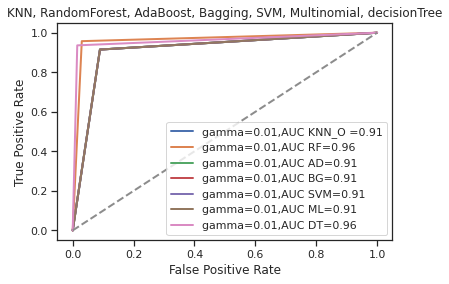

In [87]:
from sklearn import metrics

#fpr = False Positive Rate (taux des false positive)
#tpr = True Positive Rate (taux des true positive)
#thr = Permet la modification du seillage (Pas = [0.1] ou [0.2], etc..): cela est définie automatiquement par l'algorithme en fontion des matrices de confusion
fpr,tpr,thr = metrics.roc_curve(y_test,y_pred_knn_o)
fpr2,tpr2,thr2 = metrics.roc_curve(y_test,y_pred_RandomForest)
fpr3,tpr3,thr3 = metrics.roc_curve(y_test,y_pred_AdaBoost)
fpr4,tpr4,thr4 = metrics.roc_curve(y_test,y_pred_Bagging)
fpr5,tpr5,thr5 = metrics.roc_curve(y_test,y_pred_SVM)
fpr6,tpr6,thr6 = metrics.roc_curve(y_test,y_pred_Multinomial)
fpr7,tpr7,thr7 = metrics.roc_curve(y_test,y_pred_decisionTree)

#auc = aerea under cuve = plus que 'auc' soit  grande plus quelle soit élevée par rapport aux autres courbes
#la plus grande auc est constitue le meilleur algorithme
auc = metrics.auc(fpr,tpr)
auc2 = metrics.auc(fpr2,tpr2)
auc3 = metrics.auc(fpr3,tpr3)
auc4 = metrics.auc(fpr4,tpr4)
auc5 = metrics.auc(fpr5,tpr5)
auc6 = metrics.auc(fpr6,tpr6)
auc7 = metrics.auc(fpr7,tpr7)

#plot = affichage des informations explicatives sur la figure
plt.plot(fpr,tpr,'-',lw=2,label='gamma=0.01,AUC KNN_O =%.2f'%auc)
plt.plot(fpr2,tpr2,'-',lw=2,label='gamma=0.01,AUC RF=%.2f'%auc2)
plt.plot(fpr3,tpr3,'-',lw=2,label='gamma=0.01,AUC AD=%.2f'%auc3)
plt.plot(fpr4,tpr4,'-',lw=2,label='gamma=0.01,AUC BG=%.2f'%auc4)
plt.plot(fpr5,tpr5,'-',lw=2,label='gamma=0.01,AUC SVM=%.2f'%auc5)
plt.plot(fpr6,tpr6,'-',lw=2,label='gamma=0.01,AUC ML=%.2f'%auc6)
plt.plot(fpr7,tpr7,'-',lw=2,label='gamma=0.01,AUC DT=%.2f'%auc7)

plt.plot([0, 1], [0, 1], lw=2, linestyle='--')

#
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('KNN, RandomForest, AdaBoost, Bagging, SVM, Multinomial, decisionTree')
plt.legend(loc='lower right')